install package

In [1]:
# !pip install xgboost

package

In [34]:
import pandas as pd
import numpy as np
from scipy.io import arff
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D


In [3]:
#chuyển afff sang csv

data = arff.loadarff('../data/Training Dataset.arff')
data = pd.DataFrame(data[0])
#loại bỏ binary
data = data.apply(lambda col: col.map(lambda x: x.decode() if isinstance(x, bytes) else x))
data.to_csv('../data/data.csv', index=False)

In [4]:
data = pd.read_csv('../data/data.csv')
data

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


In [5]:
data.shape

(11055, 31)

In [6]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [8]:
data.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Xếp lại data
data = data.sample(frac=1).reset_index(drop=True)

In [10]:
#x -> thuộc tính, y -> kết quả
y = data['Result']
x = data.drop('Result', axis=1)

In [11]:
x.shape, y.shape

((11055, 30), (11055,))

In [12]:
#Chia tập training, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
x_train.shape, x_test.shape, y_train.size, y_test.size

((8844, 30), (2211, 30), 8844, 2211)

In [24]:
models = []
trains = []
tests = []
def save_models_trains_tests(model, train, test):
    models.append(model)
    trains.append(train)
    tests.append(test)

Training

In [25]:
#Máy vector hỗ trợ(Support Vector Machines)
svm = SVC(kernel='linear', random_state=42, C=1)
svm.fit(x_train, y_train)
y_svm_pred_train = svm.predict(x_train)
y_svm_pred_test = svm.predict(x_test)
svm_accuracy_train = accuracy_score(y_train, y_svm_pred_train)
svm_accuracy_test = accuracy_score(y_test, y_svm_pred_test)
print("SVM: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(svm_accuracy_train))
print("SVM: Độ chính xác trên dữ liệu thử: {:.3f}".format(svm_accuracy_test))
save_models_trains_tests("SVM", svm_accuracy_train, svm_accuracy_test)
svm_cv = pd.Series(cross_val_score(svm, x_train, y_train, cv=5))

SVM: Độ chính xác trên dữ liệu đào tạo: 0.927
SVM: Độ chính xác trên dữ liệu thử: 0.929


In [26]:
#Cây quyết định (Decision Tree)
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(x_train, y_train)
y_tree_pred_train = tree.predict(x_train)
y_tree_pred_test = tree.predict(x_test)
accuracy_train = accuracy_score(y_train, y_tree_pred_train)
accuracy_test = accuracy_score(y_test, y_tree_pred_test)
print("Decision Tree: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(accuracy_train))
print("Decision Tree: Độ chính xác trên dữ liệu thử: {:.3f}".format(accuracy_test))
save_models_trains_tests("Decision Tree", accuracy_train, accuracy_test)
tree_cv = pd.Series(cross_val_score(tree, x_train, y_train, cv=5))
tree_cv

Decision Tree: Độ chính xác trên dữ liệu đào tạo: 0.925
Decision Tree: Độ chính xác trên dữ liệu thử: 0.930


0    0.930469
1    0.911815
2    0.928773
3    0.915772
4    0.925339
dtype: float64

In [27]:
#RandomForest
rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(x_train, y_train)
y_rf_pred_train = rf.predict(x_train)
y_rf_pred_test = rf.predict(x_test)
rf_accuracy_train = accuracy_score(y_train, y_rf_pred_train)
rf_accuracy_test = accuracy_score(y_test, y_rf_pred_test)
print("RandomForest: Độ chính xác trên dữ liệu đào tạo: {:.3f}".format(rf_accuracy_train))
print("RandomForest: Độ chính xác trên dữ liệu thử: {:.3f}".format(rf_accuracy_test))
save_models_trains_tests("RandomForest", rf_accuracy_train, rf_accuracy_test)
rf_cv = pd.Series(cross_val_score(rf, X=x_test, y=y_test, cv=5))
rf_cv

RandomForest: Độ chính xác trên dữ liệu đào tạo: 0.932
RandomForest: Độ chính xác trên dữ liệu thử: 0.940


0    0.939052
1    0.936652
2    0.927602
3    0.941176
4    0.925339
dtype: float64

In [19]:
#lưu model
pickle.dump(svm, open('../models/svm.pkl', 'wb'))
pickle.dump(rf, open('../models/rf.pkl', 'wb'))
pickle.dump(tree, open('../models/tree.pkl', 'wb'))

In [28]:
#So sánh các mô hình
results = pd.DataFrame(
    {
        'Model': models, 
        'Train Accuracy': trains, 
        'Test Accuracy': tests
    }
)
results.sort_values(by=['Train Accuracy', 'Test Accuracy'], ascending=False, inplace=True)
results

,Model,Train Accuracy,Test Accuracy
2,RandomForest,0.932157,0.939846
0,SVM,0.927295,0.929444
1,Decision Tree,0.925486,0.930348


In [29]:
model_compare = pd.concat([svm_cv, tree_cv, rf_cv], axis=1)
model_compare["index"] = list(model_compare.index)
model_compare.columns=(["Svm", "Tree", "RandomForest", "index"])
model_compare

,Svm,Tree,RandomForest,index
0,0.922555,0.930469,0.939052,0
1,0.930469,0.911815,0.936652,1
2,0.928773,0.928773,0.927602,2
3,0.923686,0.915772,0.941176,3
4,0.927602,0.925339,0.925339,4


In [30]:
model_compare.describe()

,Svm,Tree,RandomForest,index
count,5.000000,5.000000,5.000000,5.000000
mean,0.926617,0.922434,0.933964,2.000000
std,0.003375,0.008221,0.007071,1.581139
min,0.922555,0.911815,0.925339,0.000000
25%,0.923686,0.915772,0.927602,1.000000
50%,0.927602,0.925339,0.936652,2.000000
75%,0.928773,0.928773,0.939052,3.000000
max,0.930469,0.930469,0.941176,4.000000


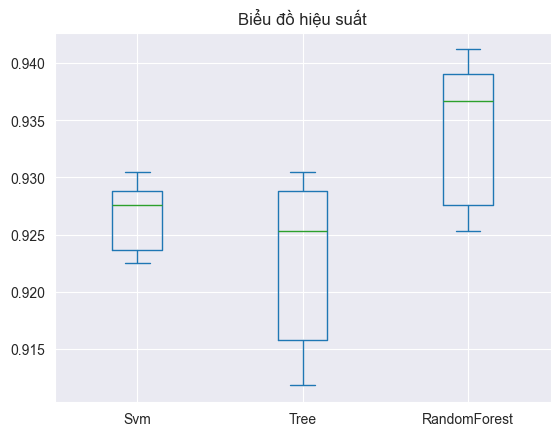

In [31]:
model_compare.drop("index", axis=1).plot.box()
plt.title("Biểu đồ hiệu suất")
plt.show()

Random Forest có điểm đánh giá cao nhất trong cả 2 tập train và test, lựa chọn mô hình này làm mô hình dự đoán cho input người dùng.

SVM có điểm đánh giá cao thứ 2 nhưng có độ ổn định là cao nhất.

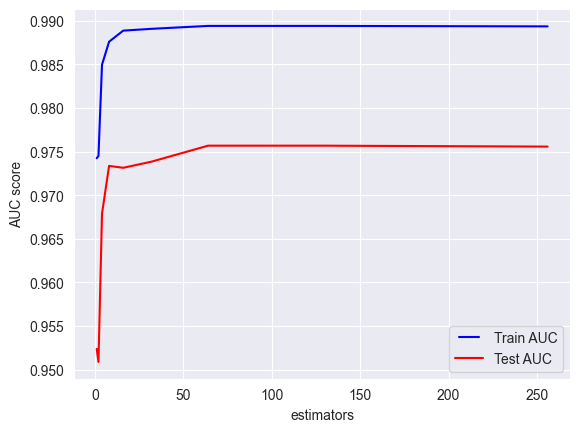

In [37]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_rf_pred_test)
roc_auc = auc(false_pos_rate, true_pos_rate)
estimators = [1, 2, 4, 8, 16, 32, 64, 128, 256]
test_res = []
train_res = []

for estimator in estimators:
    rf_t = RandomForestClassifier(n_estimators=estimator, random_state=42)
    rf_t.fit(x_train, y_train)
    rf_t_train_pred = rf_t.predict(x_train)
    
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_train, rf_t_train_pred)
    roc_auc = auc(false_pos_rate, true_pos_rate)
    train_res.append(roc_auc)
    
    
    y_rf_pred_test = rf_t.predict(x_test)
    false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_rf_pred_test)
    roc_auc = auc(false_pos_rate, true_pos_rate)
    test_res.append(roc_auc)
    
line1, = plt.plot(estimators, train_res, 'b', label="Train AUC")
line2, = plt.plot(estimators, test_res, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('estimators')
plt.show()


Từ đồ thị, số estimator cho kết quả tốt nhất khoảng 64. Tuy nhiên với estimator càng lớn, hiệu suất sẽ càng giảm.

In [38]:
f_model = RandomForestClassifier(n_estimators=64, random_state=42)
f_model.fit(x_train, y_train)
y_f_model_pred_test = f_model.predict(x_test)
f_model_accuracy_test = accuracy_score(y_test, y_f_model_pred_test)
print("RandomForest với estimator = 64: Độ chính xác trên dữ liệu thử: {:.3f}".format(f_model_accuracy_test))

RandomForest với estimator = 64: Độ chính xác trên dữ liệu thử: 0.977


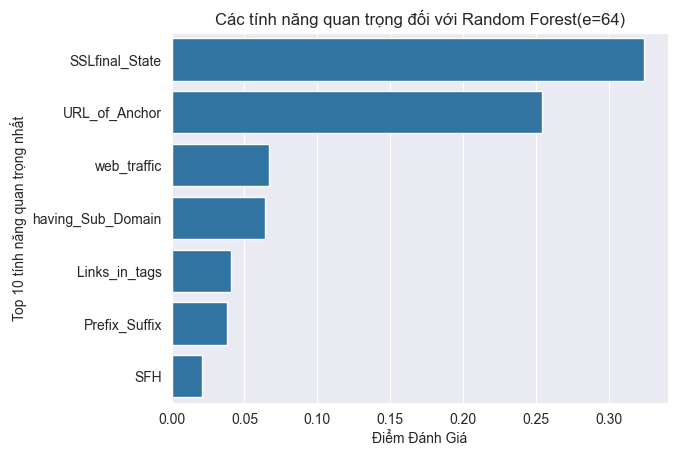

In [44]:
features_importances = pd.Series(f_model.feature_importances_,index=x_test.columns.tolist()).sort_values(ascending=False)
top_features = features_importances[features_importances >= 0.02].nlargest(10)
sns.barplot(x=top_features, y=top_features.index)
plt.xlabel("Điểm Đánh Giá")
plt.ylabel("Top 10 tính năng quan trọng nhất")
plt.title("Các tính năng quan trọng đối với Random Forest(e=64)")
plt.show()

In [39]:
#lưu model có độ chính xác trên tập thử cao nhất
pickle.dump(f_model, open('../models/final_model.pkl', 'wb'))

Load model đã train và thử nghiệm với input

In [40]:
model = pickle.load(open('../models/final_model.pkl', 'rb'))
model

RandomForestClassifier(n_estimators=64, random_state=42)

In [42]:
print(model.predict([[1,0,-1,1,0,-1,-1,-1,0,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1]]))
print(model.predict_proba([[1,0,-1,1,0,-1,-1,-1,0,1,1,1,-1,-1,0,-1,-1,-1,0,1,1,1,1,1,-1,-1,-1,1,0,-1]]))


[-1]
[[1. 0.]]


C:\Users\admin\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\admin\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
